In [2]:
import pandas as pd
import pickle
import numpy as np
from numpy import load
from sklearn.metrics import classification_report
from numpy import random
import seaborn as sns
random.seed(2814)

In [3]:
df = pd.read_csv('../../data/processed/Define/seai_missingforest_data_imputed.csv')

In [4]:
df

,CountyName,DwellingTypeDescr,YearofConstruction,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy,EnergyRating
0,Donegal,Detached house,1997,171.190,Heating Oil,Heating Oil,Natural vent.,Masonry,one,Factory Insulated,20.000000,25474.522000,C2
1,Kildare,Detached house,2010,242.930,Heating Oil,Heating Oil,Natural vent.,Masonry,two,Factory Insulated,50.000000,27654.474000,B3
2,Dublin,Semi-detached house,1999,99.380,Mains Gas,Mains Gas,Natural vent.,Masonry,three,Loose Jacket,20.000000,17000.038000,C3
3,Dublin,Semi-detached house,1965,138.410,Mains Gas,Mains Gas,Natural vent.,Masonry,two,Factory Insulated,39.350000,22708.484000,C2
4,Dublin,Semi-detached house,1985,127.160,Mains Gas,Mains Gas,Natural vent.,Masonry,two,Loose Jacket,100.000000,28182.863000,D2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951816,Dublin,Mid-floor apartment,2020,37.797,Electricity,Electricity,Bal.whole mech.vent heat recvr,Masonry,four,Factory Insulated,32.030000,2279.816108,A3
951817,Dublin,Mid-floor apartment,2020,86.580,Electricity,Electricity,Bal.whole mech.vent heat recvr,Masonry,three,None,9.843333,5843.378697,A2
951818,Donegal,Detached house,1982,214.180,Heating Oil,Heating Oil,Natural vent.,Masonry,one,Factory Insulated,35.240000,52927.526000,D2
951819,Dublin,Mid-terrace house,1900,99.770,Manufactured Smokeless Fuel,Electricity,Natural vent.,Masonry,four,None,14.516667,40838.471060,G


(0.0, 60000.0)

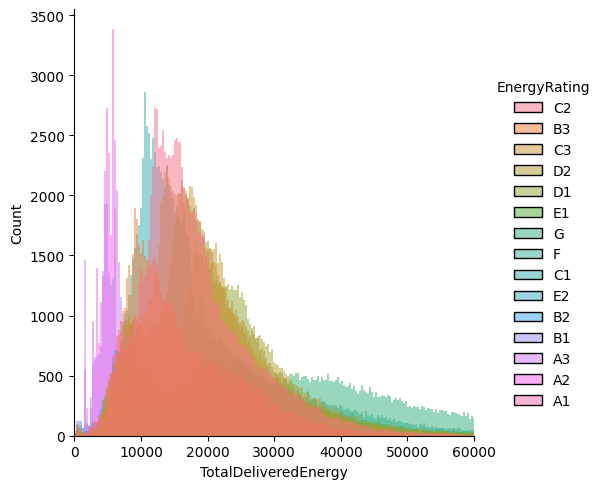

In [27]:
sns.displot(df, x="TotalDeliveredEnergy", hue = 'EnergyRating', )
import matplotlib.pyplot as plt
plt.xlim(0, 60000)

In [39]:
X_train = load('../../data/interim//Design/X_train.npy')
X_test = load('../../data/interim/Design/X_test.npy')
y_train = load('../../data/interim/Design/y_train.npy')
y_test = load('../../data/interim/Design/y_test.npy')

In [40]:
model_rf = pickle.load(open('../../models/final_model.pkl', 'rb'))
model_dt = pickle.load(open('../../models/dt_optimal.pkl', 'rb'))
model_knn = pickle.load(open('../../models/knn_optimal.pkl', 'rb'))

In [5]:
y_pred_knn_optimal = model_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn_optimal))

              precision    recall  f1-score   support

           0       0.10      0.35      0.15       196
           1       0.74      0.75      0.74      5195
           2       0.72      0.67      0.70      6857
           3       0.20      0.47      0.28      2773
           4       0.22      0.41      0.29      6231
           5       0.29      0.35      0.32     15040
           6       0.34      0.28      0.31     22077
           7       0.34      0.22      0.27     24325
           8       0.31      0.23      0.27     23215
           9       0.30      0.23      0.26     22520
          10       0.29      0.25      0.26     19384
          11       0.19      0.29      0.23     11198
          12       0.18      0.30      0.22      8873
          13       0.25      0.35      0.29      9191
          14       0.69      0.64      0.66     13290

    accuracy                           0.33    190365
   macro avg       0.34      0.39      0.35    190365
weighted avg       0.34   

In [42]:
y_pred_dt_optimal = model_dt.predict(X_test)

print(classification_report(y_test, y_pred_dt_optimal))

              precision    recall  f1-score   support

           0       0.21      0.37      0.27       196
           1       0.82      0.85      0.84      5195
           2       0.84      0.80      0.82      6857
           3       0.51      0.70      0.59      2773
           4       0.62      0.73      0.67      6231
           5       0.77      0.76      0.77     15040
           6       0.79      0.77      0.78     22077
           7       0.78      0.76      0.77     24325
           8       0.75      0.73      0.74     23215
           9       0.75      0.72      0.74     22520
          10       0.76      0.73      0.74     19384
          11       0.66      0.72      0.69     11198
          12       0.70      0.73      0.71      8873
          13       0.76      0.80      0.78      9191
          14       0.94      0.91      0.93     13290

    accuracy                           0.76    190365
   macro avg       0.71      0.74      0.72    190365
weighted avg       0.77   

In [7]:
y_pred_rf_optimal = model_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf_optimal))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42       196
           1       0.89      0.88      0.88      5195
           2       0.87      0.87      0.87      6857
           3       0.64      0.75      0.69      2773
           4       0.75      0.78      0.77      6231
           5       0.82      0.84      0.83     15040
           6       0.85      0.82      0.83     22077
           7       0.84      0.80      0.82     24325
           8       0.81      0.77      0.79     23215
           9       0.80      0.77      0.78     22520
          10       0.78      0.79      0.79     19384
          11       0.70      0.77      0.73     11198
          12       0.72      0.77      0.75      8873
          13       0.77      0.84      0.80      9191
          14       0.95      0.93      0.94     13290

    accuracy                           0.81    190365
   macro avg       0.78      0.78      0.78    190365
weighted avg       0.81   

In [8]:
classes=['A1','A2','A3','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
features = [
    'CountyName',
	'DwellingTypeDescr',
    'YearofConstruction',
    'GroundFloorArea(sq m)',
    'MainSpaceHeatingFuel',	
    'MainWaterHeatingFuel',	
    'VentilationMethod',
    'StructureType',
    'NoOfSidesSheltered',
    'InsulationType',
    'InsulationThickness',
    'TotalDeliveredEnergy',
    'EnergyCost']

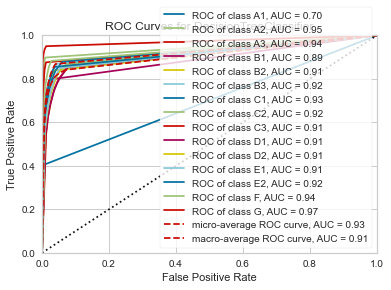

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [24]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model_dt, classes=classes)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.datasets import  make_classification
from sklearn.ensemble import RandomForestClassifier
def plot_roc_curve(y_test, y_pred):

    n_classes = len(np.unique(y_test))
    y_test = label_binarize(y_test, classes=np.arange(n_classes))
    y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    #plt.figure(figsize=(10,5))
    plt.figure(dpi=600)
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

    plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

    colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()

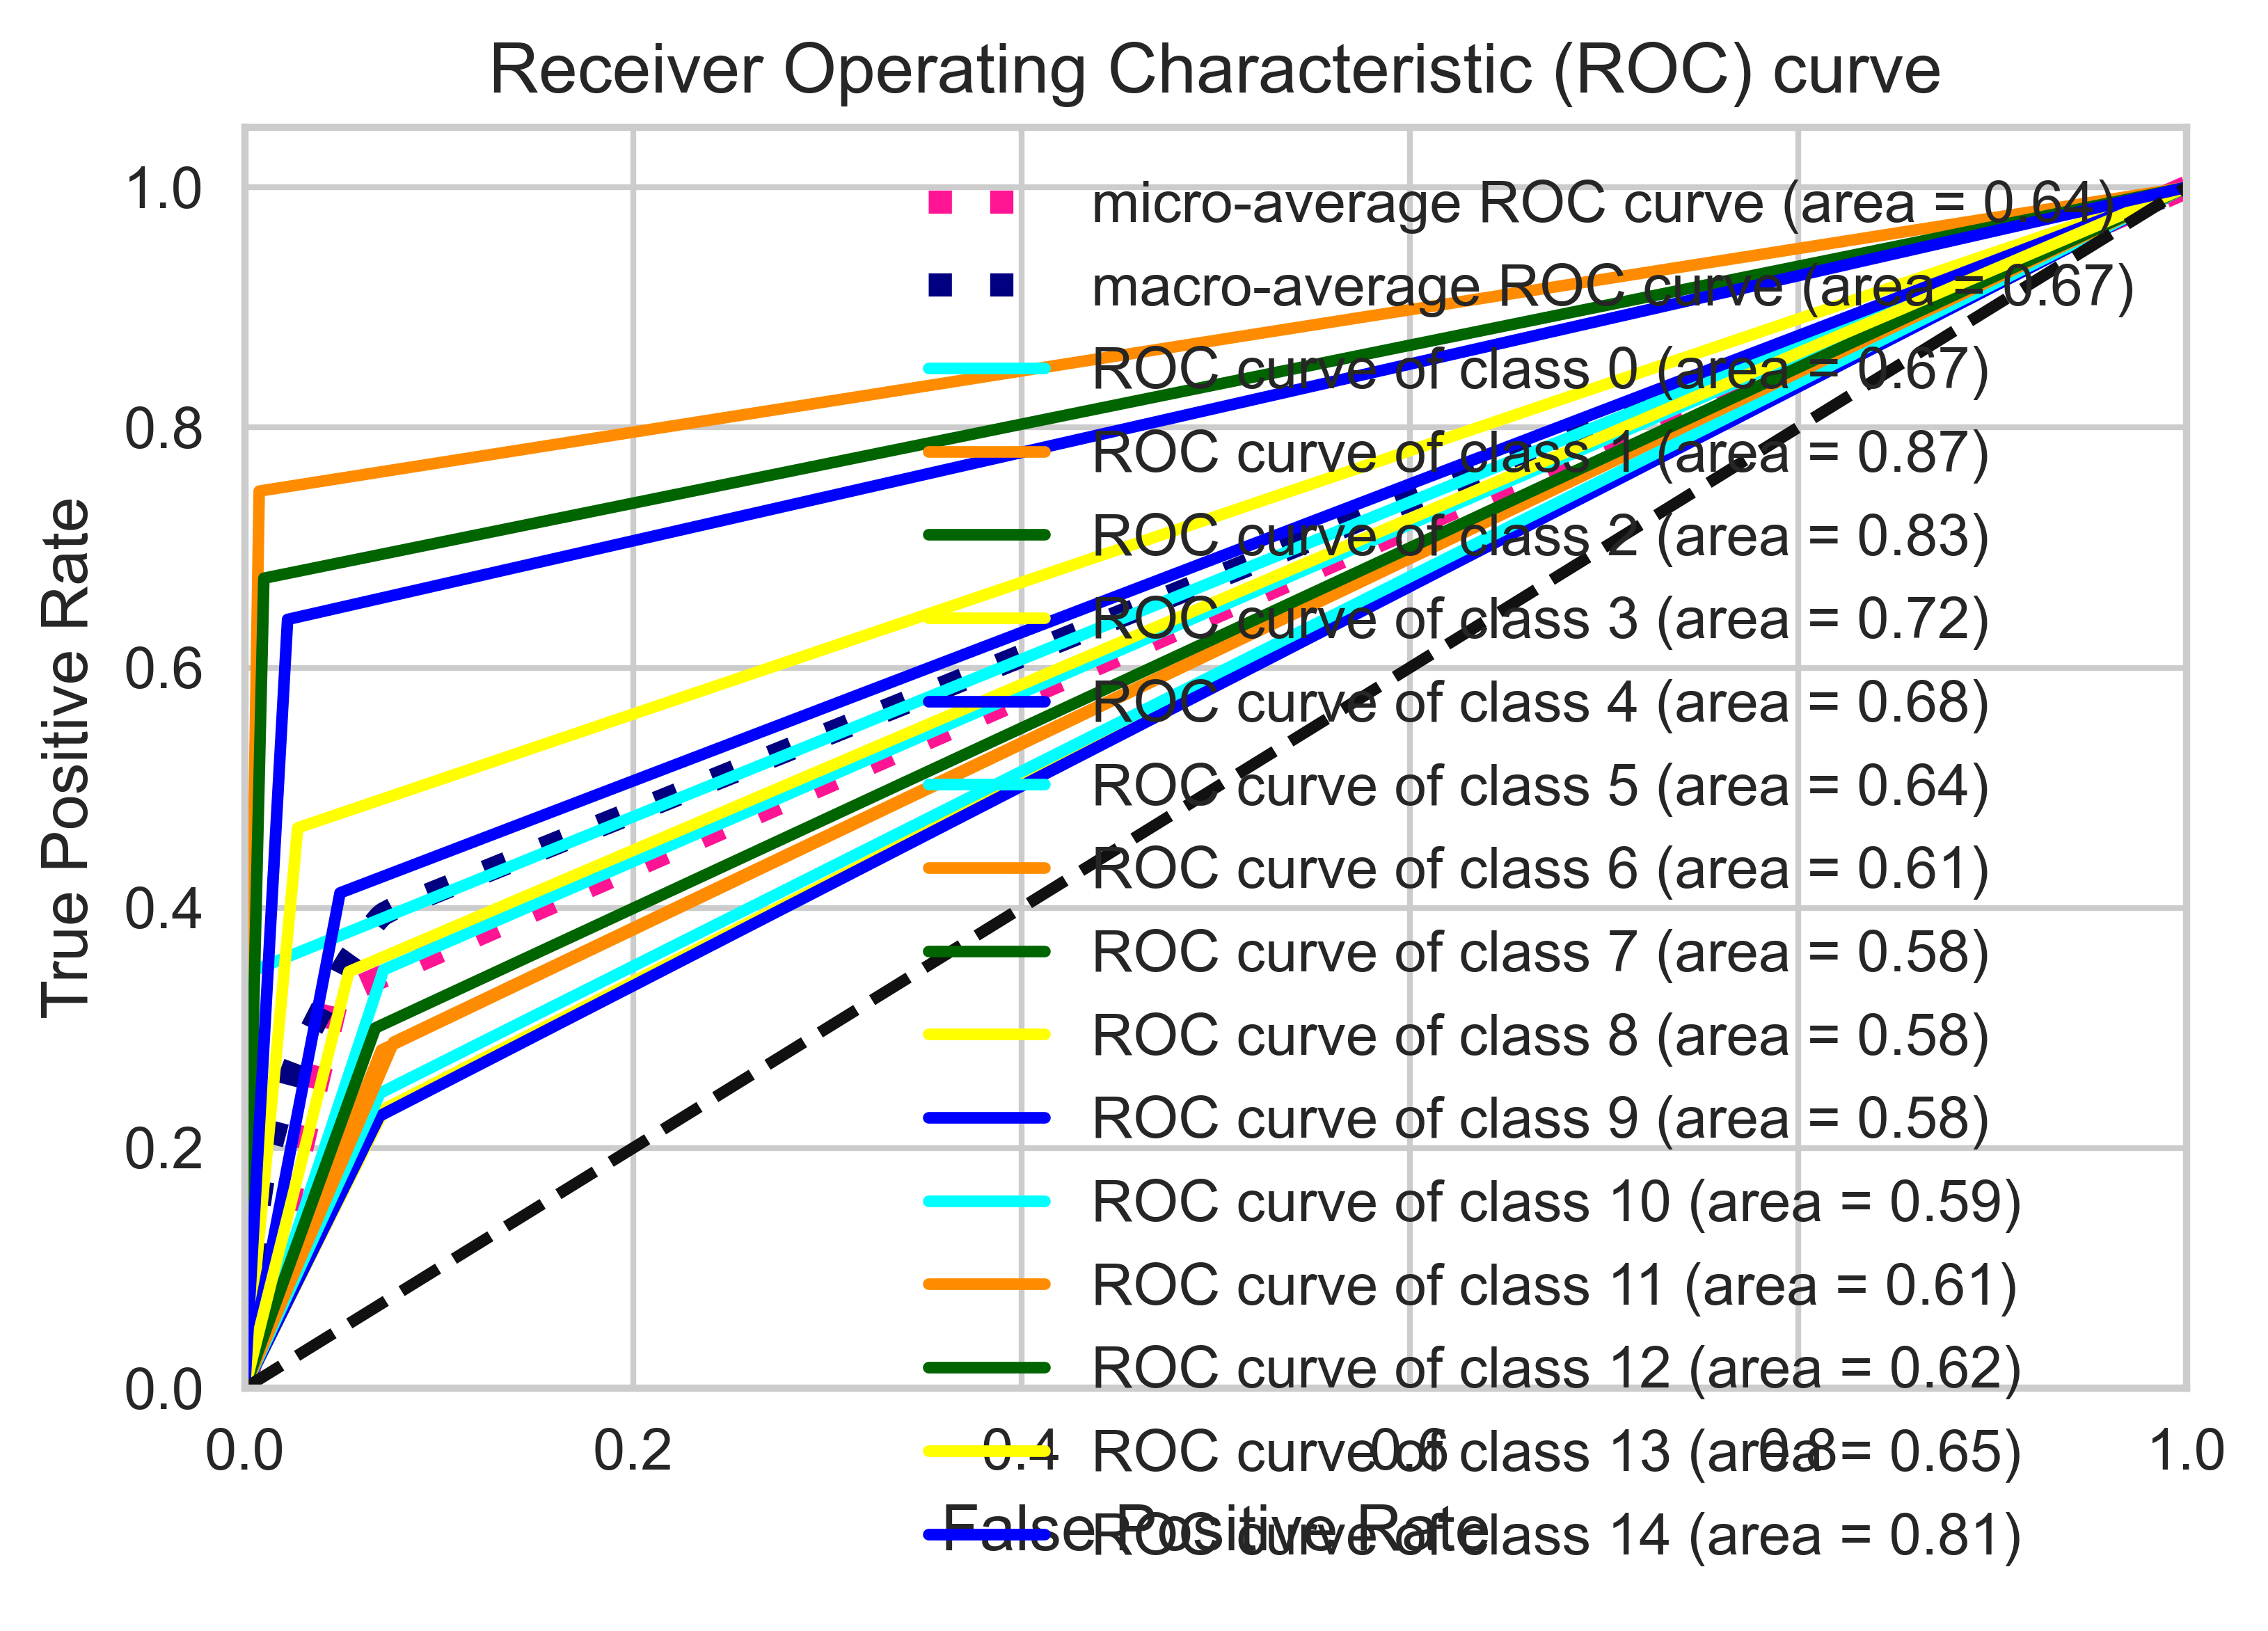

In [43]:
plot_roc_curve(y_test, y_pred_knn_optimal)